In [1]:
# 데이터들을 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bus=pd.read_csv("Seoul_bus_statistics_Mar_2025.csv",encoding='cp949')
metro=pd.read_csv("Seoul_metro_statistics_Mar_2025.csv",encoding='cp949')

bus= bus.iloc[:,[1,2,5]+list(range(18,26))] #데이터 슬라이싱은 "pd.DataFrame(bus.columns)"로 참고했습니다.
metro= metro.iloc[:,[1,2]+list(range(7,15))] #데이터 슬라이싱은 "pd.DataFrame(metro.columns)"로 참고했습니다.

plt.rc('font',family="Malgun Gothic")


In [2]:
# 서울시 승차량 상위 30개 버스 정류장의 사분위와 상위 30개 지하철역의 사분위를 도출합니다.

bus['commuters']=bus.iloc[:,3:10].sum(axis=1)

bus=bus.sort_values(by='commuters',ascending=False)

bus_head=bus.head(30)

metro['commuters']=metro.iloc[:,2:10].sum(axis=1)

metro=metro.sort_values(by='commuters',ascending=True)

bus_q1=np.percentile(bus_head['commuters'],25)
bus_q2=bus_head['commuters'].mean()
bus_q3=np.percentile(bus_head['commuters'],75)

metro_head=metro.tail(30)

metro_q1=np.percentile(metro_head['commuters'],25)
metro_q2=metro_head['commuters'].mean()
metro_q3=np.percentile(metro_head['commuters'],75)

print('승하차량 상위 30개 버스와 지하철역 사분위')
print('종류  Q! //  Q2  //  Q3')
print(f'bus {bus_q1} // {bus_q2:.2f} // {bus_q3}')
print(f'metro {metro_q1} // {metro_q2} // {metro_q3}')


승하차량 상위 30개 버스와 지하철역 사분위
종류  Q! //  Q2  //  Q3
bus 19741.25 // 24758.67 // 27285.75
metro 486858.5 // 650907.8 // 812025.75


### 승하차량 상위 30개 버스 정류장과 지하철 역의 사분위수를 추출해 비교합니다
* 대체적으로 지하철에 비해 버스의 사분위수가 더욱 높은 것을 확인할 수 있습니다.
* 따라서 출근시간대 지하철이 서울시민들의 주간선 역할을 한다고 전제할 수 있습니다.

C:\Users\user\AppData\Local\Temp\ipykernel_31796\2903771385.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metroS_filtered["권역"] = metroS_filtered["지하철역"].map(station_to_zone)


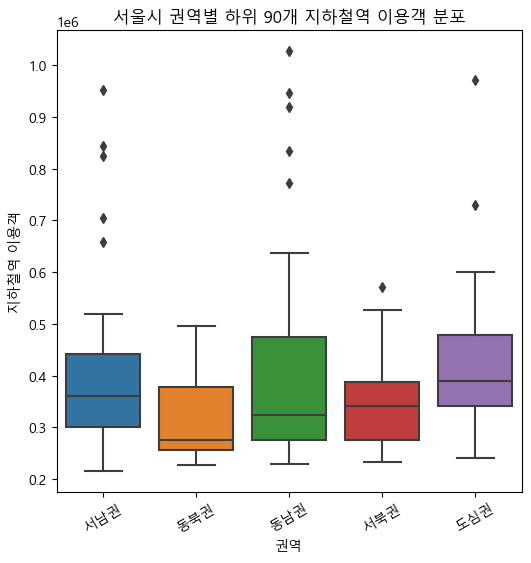

In [3]:
# 서울지하철 하위 90개 역들을 자치구별로 구분해 출퇴근 시간대 이용객 분포를 나타냅니다.

metroS_tail=metro.tail(170)

# seoul_stations 리스트
seoul_stations = [
    "종각", "광화문(세종문화회관)", "충무로", "시청", "을지로입구", "을지로3가", "을지로4가",
    "서울역", "회현(남대문시장)", "명동", "안국", "경복궁(정부서울청사)", "공덕", "신용산", "삼각지",
    "청량리(서울시립대입구)", "회기", "답십리", "장한평", "건대입구", "구의(광진구청)",
    "아차산(어린이대공원후문)", "어린이대공원(세종대)", "면목", "상봉", "사가정", "중화",
    "용마산(용마폭포공원)", "석계", "성신여대입구(돈암)", "길음", "미아사거리", "미아(서울사이버대학)",
    "수유(강북구청)", "쌍문", "창동", "노원", "상계", "중계", "하계", "마들", "태릉입구",
    "연신내", "불광", "구파발", "홍제", "서대문", "합정", "홍대입구", "디지털미디어시티", "망원", "상암",
    "가양", "염창", "발산", "화곡", "까치산", "목동", "오목교(목동운동장앞)", "국회의사당",
    "영등포구청", "당산", "신도림", "구로", "구로디지털단지", "가산디지털단지", "독산", "남구로",
    "대림(구로구청)", "철산", "신림", "봉천", "서울대입구(관악구청)", "낙성대(강감찬)", "사당", "이수",
    "신대방", "신대방삼거리", "노량진", "흑석(중앙대입구)", "장승배기", "상도", "숭실대입구(살피재)",
    "강남", "역삼", "삼성(무역센터)", "선릉", "학동", "논현", "신논현", "양재(서초구청)",
    "교대(법원.검찰청)", "남부터미널(예술의전당)", "고속터미널", "반포", "강남구청", "압구정",
    "압구정로데오", "청담", "봉은사", "잠실(송파구청)", "잠실새내", "잠실나루", "장지",
    "송파나루", "가락시장", "천호(풍납토성)", "강동", "암사", "둔촌동", "길동", "굽은다리",
    "명일", "고덕", "상일동"
]


station_to_zone = {
    "종각": "도심권", "광화문(세종문화회관)": "도심권", "충무로": "도심권", "시청": "도심권", 
    "을지로입구": "도심권", "을지로3가": "도심권", "을지로4가": "도심권", "서울역": "도심권", 
    "회현(남대문시장)": "도심권", "명동": "도심권", "안국": "도심권", "경복궁(정부서울청사)": "도심권", 
    "공덕": "도심권", "신용산": "도심권", "삼각지": "도심권",

    "청량리(서울시립대입구)": "동북권", "회기": "동북권", "답십리": "동북권", "장한평": "동북권",
    "건대입구": "동북권", "구의(광진구청)": "동북권", "아차산(어린이대공원후문)": "동북권",
    "어린이대공원(세종대)": "동북권", "면목": "동북권", "상봉": "동북권", "사가정": "동북권",
    "중화": "동북권", "용마산(용마폭포공원)": "동북권", "석계": "동북권", "성신여대입구(돈암)": "동북권",
    "길음": "동북권", "미아사거리": "동북권", "미아(서울사이버대학)": "동북권", "수유(강북구청)": "동북권",
    "쌍문": "동북권", "창동": "동북권", "노원": "동북권", "상계": "동북권", "중계": "동북권", "하계": "동북권",
    "마들": "동북권", "태릉입구": "동북권",

    "연신내": "서북권", "불광": "서북권", "구파발": "서북권", "홍제": "서북권", "서대문": "서북권",
    "합정": "서북권", "홍대입구": "서북권", "디지털미디어시티": "서북권", "망원": "서북권", "상암": "서북권",

    "가양": "서남권", "염창": "서남권", "발산": "서남권", "화곡": "서남권", "까치산": "서남권",
    "목동": "서남권", "오목교(목동운동장앞)": "서남권", "국회의사당": "서남권", "영등포구청": "서남권",
    "당산": "서남권", "신도림": "서남권", "구로": "서남권", "구로디지털단지": "서남권",
    "가산디지털단지": "서남권", "독산": "서남권", "남구로": "서남권", "대림(구로구청)": "서남권",
    "철산": "서남권", "신림": "서남권", "봉천": "서남권", "서울대입구(관악구청)": "서남권",
    "낙성대(강감찬)": "서남권", "사당": "서남권", "이수": "서남권", "신대방": "서남권",
    "신대방삼거리": "서남권", "노량진": "서남권", "흑석(중앙대입구)": "서남권", "장승배기": "서남권",
    "상도": "서남권", "숭실대입구(살피재)": "서남권",

    "강남": "동남권", "역삼": "동남권", "삼성(무역센터)": "동남권", "선릉": "동남권", "학동": "동남권",
    "논현": "동남권", "신논현": "동남권", "양재(서초구청)": "동남권", "교대(법원.검찰청)": "동남권",
    "남부터미널(예술의전당)": "동남권", "고속터미널": "동남권", "반포": "동남권", "강남구청": "동남권",
    "압구정": "동남권", "압구정로데오": "동남권", "청담": "동남권", "봉은사": "동남권",
    "잠실(송파구청)": "동남권", "잠실새내": "동남권", "잠실나루": "동남권", "장지": "동남권",
    "송파나루": "동남권", "가락시장": "동남권", "천호(풍납토성)": "동남권", "강동": "동남권",
    "암사": "동남권", "둔촌동": "동남권", "길동": "동남권", "굽은다리": "동남권",
    "명일": "동남권", "고덕": "동남권", "상일동": "동남권"
}


metroS_filtered = metroS_tail[metroS_tail['지하철역'].isin(seoul_stations)]

metroS_filtered["권역"] = metroS_filtered["지하철역"].map(station_to_zone)



plt.figure(figsize=(6, 6))
sns.boxplot(x="권역", y="commuters", data=metroS_filtered)

plt.title("서울시 권역별 하위 90개 지하철역 이용객 분포")
plt.xlabel("권역")
plt.ylabel("지하철역 이용객")
plt.xticks(rotation=30)

plt.show()

### 서울시 하위 90개 역들을 권역별로 나누어 이들 사이에서 승차량 차이가 얼마나 나는지에 대해 분석하이 위한 boxplot입니다.
* 승하차량 7000을 넘는 이상치는 '승하차량 하위 역'이라는 분석 취지에 어긋나므로 제거했습니다.
* 서울 서남권인 강서, 양천, 구로, 금천, 영등포, 관악, 동작구는 일부 지역을 제외하고는 철도교통이 대체적으로 수요를 잘 분산하는 모습을 보이고 있습니다. 이는 서울의 나머지 권역 역시 마찬가지입니다.
* 반면, 동북권의 승하차량 하위 역들은 상대적으로 그래프 아래에 몰려있는 모습입니다. 도심권의 밀집된 역 배치를 감안하면 동북권의 철도교통 확충이 더 필요해 보입니다.

In [4]:
# 권역 별로 분산과 표준편차 값을 구합니다.

regions = ['도심권', '동북권', '서북권', '서남권', '동남권']
variances = []
std_devs = []
mean_vals = []

for region in regions:
    subset = metroS_filtered[metroS_filtered['권역'] == region]
    
    variances.append(round(subset['commuters'].var(), 2))
    std_devs.append(round(subset['commuters'].std(), 2))
    mean_vals.append(round(subset['commuters'].mean(), 2))


print("서울 도심권역별 하위 90개 지하철역 기술통계")
print('도심권/', '동북권/', '서북권/', '서남권/', '동남권/','순서대로 읽으면 됩니다')

print('=='*10)

print(f"분산: {variances}")
print(f"표준편차: {std_devs}")
print(f"평균: {mean_vals}")

서울 도심권역별 하위 90개 지하철역 기술통계
도심권/ 동북권/ 서북권/ 서남권/ 동남권/ 순서대로 읽으면 됩니다
분산: [36154636481.0, 5775603810.87, 13903940678.0, 35542058244.39, 59906991767.92]
표준편차: [190143.73, 75997.39, 117914.97, 188526.01, 244759.05]
평균: [447737.25, 312883.79, 361845.0, 415665.45, 439930.07]


### 서울시 하위 90개 역들을 권역별로 나눈 데이터의 기본적인 평균과 변량을 분석해 전체적인 수치를 정확히 알아냅니다.
* 분산의 경우 도심권, 서울 동북권, 동남권의 분산값이 큰 것으로 판단되었습니다. 도심권, 동남권은 오히려 표준편차는 작아진 것으로 보아 일부 역들을 제외하면 하위 역들의 이용객이 특히 적음을 짐작할 수 있습니다.
* 서울 동북권의 경우는 분산과 표준편차 모두 크므로 상대적으로 많이 타는 역과 적게 타는 역의 차이가 많음을 알 수 있습니다.

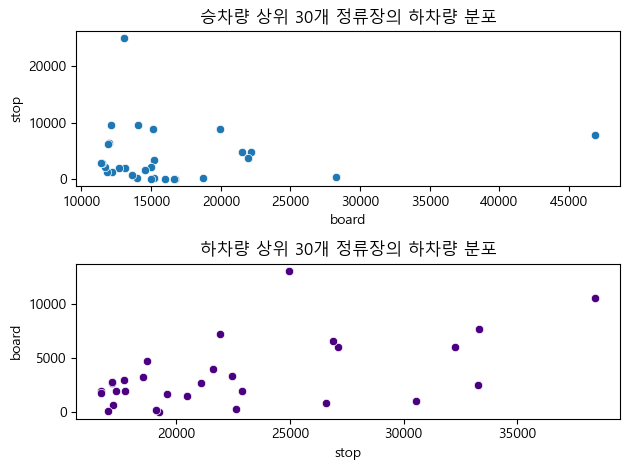

In [5]:
# 버스의 승차량과 하차량 간의 관계를 산점도로 표시합니다.
bus['commuters']=bus.iloc[:,3:10].sum(axis=1)

bus=bus.sort_values(by='commuters',ascending=False)

bus['board']=bus.iloc[:,[3,5,7,9]].sum(axis=1)
bus['stop']=bus.iloc[:,[4,6,8,10]].sum(axis=1)

bus_board=bus.sort_values(by='board',ascending=False)
bus_board=bus_board.head(30)
bus_board=bus_board.iloc[:,11:15]

bus_alight=bus.sort_values(by='stop',ascending=False)
bus_alight=bus_alight.head(30)
bus_alight=bus_alight.iloc[:,11:15]

plt.subplot(211)
sns.scatterplot(data=bus_board,x='board',y='stop')
plt.title("승차량 상위 30개 정류장의 하차량 분포")
plt.tight_layout()

plt.subplot(212)
sns.scatterplot(data=bus_alight,x='stop',y='board',color='indigo')
plt.title("하차량 상위 30개 정류장의 하차량 분포")
plt.tight_layout()

### 승차량과 하차량 상위 30개 정류장들을 scatterplot으로 나타내 과연 승차량과 하차량 간 양의 상관관계가 있는지 조사합니다.
* 승차량 상위 30개 정류장의 경우는 1개의 수치를 제외하면 대체적으로 하차는 많지 않은 모습을 볼 수 있습니다.
* 하차량 상위 30개 정류장의 경우는 일정한 분포를 보이지만, 하차량이 많아질수록 분산이 심해져 정확한 조사가 필요해 보입니다.

In [6]:
# 버스 하차량 상위 30개 정류장의 피어슨 상관계수를 도출합니다.

from scipy.stats import pearsonr

correlation_coefficieint, p_value=pearsonr(bus_alight['stop'],bus_alight['board'])
print(f'상관계수: {correlation_coefficieint}, p_value: {p_value}')

상관계수: 0.5417855958406989, p_value: 0.0019862374778467037


### 하차량 상위 30개 정류장들의 승차량 상관관계를 Pearson 계수를 이용해 정확히 분석합니다.
* 버스 정류장의 승차 인원과 하차 인원 사이에는 중간 정도의 양의 상관관계(r = 0.54)가 있으며, 승차 인원이 많을수록 하차 인원도 많은 경향이 있습니다. 
* p-value가 0.00198로 매우 낮아, 이 관계는 통계적으로 유의미하며 우연이 아니라 실제 패턴임을 보여줍니다. 
* 따라서 일부 정류장은 단순한 기·종점이 아니라 교통 수요 집중지로서 기능할 가능성이 높습니다.